# Simple Linear Regression

problem statement :

Build a predictive linear regression model for given dataset, train the model for training set and test it against test dataset, plot the model using any plotting library.
Dataset url - https://drive.google.com/open?id=17Z5YVgk4hSzPvguWkck6tRb6Z2JEWdgh

In [1]:
#importing necessary library
#importing matplotlib 
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sea
#importing waninings
import warnings 
warnings.filterwarnings('ignore')
#importing pandas 
import pandas as pd
#importing numpy
import numpy as np
# loading csv data from the file given in the url
train_data = pd.read_csv("train.csv")
#prinding info of data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
x    700 non-null float64
y    699 non-null float64
dtypes: float64(2)
memory usage: 11.1 KB


In [2]:
#finding minimum and maximum values in  train dataset
x_train_minimum=train_data['x'].min()
y_train_minimum=train_data['y'].min()
x_train_maximum=train_data['x'].max()
y_train_maximum=train_data['y'].max()
#displaying data set
train_data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [3]:
# loading csv data from the file given in the url
test_data = pd.read_csv("test.csv")
#prinding info of data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
x    300 non-null int64
y    300 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


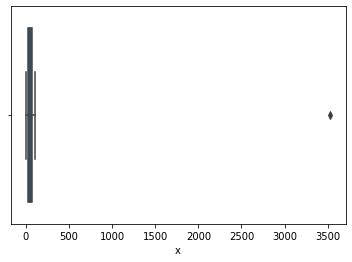

In [4]:
#Visualizing outliers
sea.boxplot(x = 'x', data = train_data)
#the above visualization clearly tells us that x containing value 3500 is a outlier

In [5]:
#dropping out outlier value
train_data.drop(train_data[train_data['x'] > 3500].index, inplace = True)

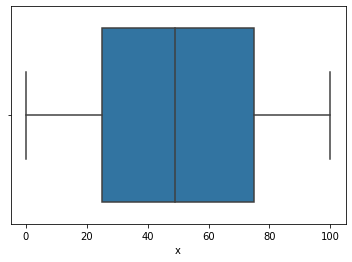

In [6]:
#now the data looks good in column x
sea.boxplot(x = 'x', data = train_data)

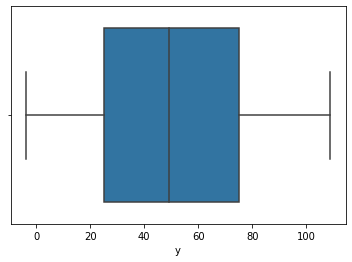

In [7]:
#also plotting y data
sea.boxplot(x = 'y', data = train_data)

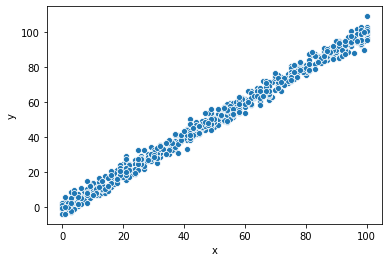

In [8]:
#plotting x data and y data together
sea.scatterplot(data= train_data,x=train_data['x'],y=train_data['y'])

In [9]:
#defining function for gradient descent
def grad_desc(x,y):
    b0 = 1                      #initializing y intercept at 1
    b1 = 0                      #initializing slope at zero
    m = len(x)                  #determining m 
    epochs = 20000              #deciding number of iterations
    learning_rate = 0.0000001   #initializing learning rate
    #looping as number of iterations
    for i in range(epochs):
        y_pred = b0 + b1 * x     #formula for finding y prediction
        cost = (1 / (2 * m)) * sum([val**2 for val in (y_pred - y)]) #formula for cost function
        b0_d = (1 / m) * sum(y_pred - y)        #determining new y intercept
        b1_d = (1 / m) * (sum((y_pred - y) * x)) #determining new slope
        b0 = b0 - (learning_rate * b0_d)        #assigning new value to y intercept accordingly
        b1 = b1 - (learning_rate * b1_d)        #assigning new value to slope accordingly
    return b0, b1

In [10]:
#obtaining gradient descent
gradient=grad_desc(train_data['x'],train_data['y'])

In [11]:
#showing the value of gradient obtained
gradient

(1.01415881177316, 0.9826194712151011)

In [12]:
#defining a function to test the data set
def predict(test):
    b0 = 1.01415881 #obtained gradient descent
    b1 = 0.98261947
    n = len(test)
    
    lis = []
    for i in range(n):
        y_pred = b0 + b1 * test[i]
        lis.append(y_pred)
    return lis  #predected values of y from test data

In [27]:
#obtaing predected values of y from test data
val =pd.DataFrame(predict(test_data['y']))
val

,0
0,79.402776
1,23.788604
2,26.178318
3,18.561176
4,42.136650
...,...
295,68.368683
296,47.526330
297,54.164672
298,63.211191


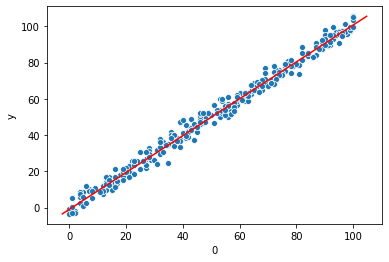

In [43]:
#plotting x data and y data together
sea.scatterplot(data= test_data,x=test_data['x'],y=test_data['y'])
#plotting gradient line
sea.lineplot(data =val,x=val[0],y= test_data['y'], c = 'r')

In [41]:
#determining accuracy 
def accuracy( y_data_test, y_pred_test):
        total_error = 0 
        for i in range(0, len(y_data_test)): 
            total_error += abs((y_pred_test[i] - y_data_test[i]) / y_data_test[i]) 
            total_error = (total_error / len(y_data_test)) 
            accuracy = 1 - total_error 
            return accuracy.mean()*100

In [42]:
#determining accuracy and printing
accuracy(test_data['y'], val)

99.86137377834227